In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

# Please scroll to the next cell to skip function definitions 

# Helper function to create black box image with white background
def create_black_box_img(width, height, black_box_size):
    img = np.ones((height, width), dtype=int)*255

    left = width//2 - black_box_size//2
    right = width//2 + black_box_size//2
    up = height//2 - black_box_size//2
    down = height//2 + black_box_size//2

    for i in range(left-1, right-1):
        img[i][up-1:down-1] = 0.1
    return img

# Helper function to check whether the coordinates X, Y are in height, width
def is_in_image(X, Y, height, width):
    if X<0 or X>=height:
        return False
    if Y<0 or Y>=width:
        return False
    return True

# Perform bilinear interpolation
def bilinear_interpolation(img, width, height):
    new_img = np.ones((height, width), dtype=int)
    for x in range(width):
        for y in range(height):
            x1, y1 = int(x), int(y)
            x2, y2 = x1 + 1, y1 + 1
            if is_in_image(y1, x1, width, height):
                if is_in_image(y2, x2, width, height):
                    r1 = (x2 - x) * img[y1, x1] + (x - x1) * img[y1, x2]
                    r2 = (x2 - x) * img[y2, x1] + (x - x1) * img[y2, x2]
                    new_img[x][y] = (y2 - y) * r1 + (y - y1) * r2
    return new_img

# Transform an image using linear transforms.
def transform(img, width, height, transformation_matrix, do_interpolation=True):
    # Initialize the new image with ones
    new_img = np.ones((height, width), dtype=int)

    for i in range(width):
        for j in range(height):
            arr = np.dot(np.array([[i, j]]), transformation_matrix)
            Y = math.floor(arr[0][0])
            X = math.floor(arr[0][1])
            if is_in_image(X, Y, width, height):
                new_img[X][Y] = img[i][j]

    if do_interpolation:
        return bilinear_interpolation(new_img, width, height)
    return new_img

# Translate an image
def translate(img, width, height, translation_vector, do_interpolation=True):
    # Initialize the new image with ones
    new_img = np.ones((height, width), dtype=int)

    # Perform the Translation
    for i in range(width):
        for j in range(height):
            Y = math.floor(i + translation_vector[0][0])
            X = math.floor(j + translation_vector[1][0])
            if is_in_image(X, Y, width, height):
                new_img[X][Y] = img[i][j]
    
    if do_interpolation:
        return bilinear_interpolation(new_img, width, height)
    return new_img

Scaling Matrix: 
 [[0.8 0. ]
 [0.  0.8]] 

Shear Matrix: 
 [[1.  0.1]
 [0.2 1. ]] 

Rotation Matrix (Theta=15 deg): 
 [[ 0.96592583 -0.25881905]
 [ 0.25881905  0.96592583]] 

Translation Vector: 
 [[60]
 [10]] 

Computed Transform Matrix (scale_mat*shear_mat*rotation_mat): 
 [[ 0.79344618 -0.12978117]
 [ 0.36160337  0.73132961]] 



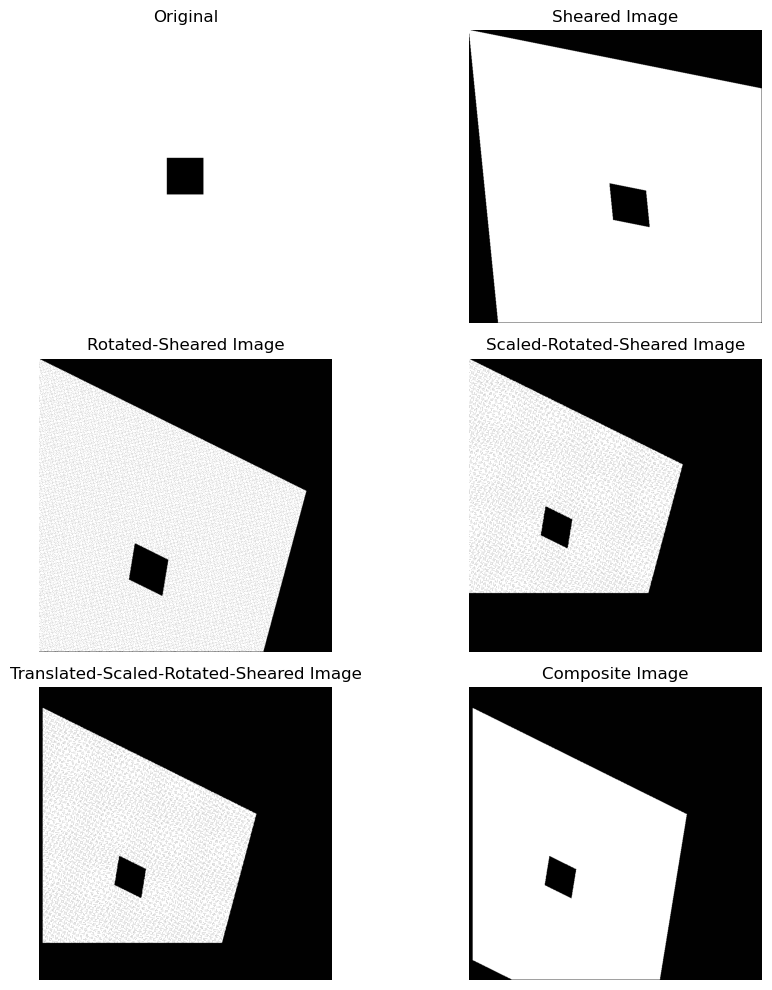

In [8]:
'''

Question 1) Part 1 - Using a an image with black box & white background

'''
WIDTH = 800
HEIGHT = 800

BLACK_BOX_SIZE = 100

#Create the black box image with white background
img = create_black_box_img(WIDTH, HEIGHT, BLACK_BOX_SIZE)

#Scaling Matrix
scale_mat = np.array([
    [0.8, 0],
    [0, 0.8]
])
print("Scaling Matrix: \n", np.matrix(scale_mat), "\n")

#Shear Matrix
shear_mat = np.array([
    [1, 0.1],
    [0.2, 1]
])
print("Shear Matrix: \n", np.matrix(shear_mat), "\n")

#Rotation Matrix
theta = 15
theta_rad = theta * np.pi/180
rotation_mat = np.array([
    [np.cos(theta_rad), -np.sin(theta_rad)],
    [np.sin(theta_rad), np.cos(theta_rad)]
])
print(f"Rotation Matrix (Theta={theta} deg): \n", np.matrix(rotation_mat), "\n")

# Translation Matrix
translation_vec = np.array([
    [60],
    [10]
])
print("Translation Vector: \n", np.matrix(translation_vec), "\n")

# Composite matrix
composite_mat = np.dot(np.dot(scale_mat, shear_mat), rotation_mat)
print("Computed Transform Matrix (scale_mat*shear_mat*rotation_mat): \n", np.matrix(composite_mat), "\n")

# After Shear
shear_img = transform(img, WIDTH, HEIGHT, shear_mat)

# After Rotation
rot_shear_img = transform(shear_img, WIDTH, HEIGHT, rotation_mat)

# After Scaling
scale_rot_shear_img = transform(rot_shear_img, WIDTH, HEIGHT, scale_mat)

# After Translation
trans_scale_rot_shear_img = translate(scale_rot_shear_img, WIDTH, HEIGHT, translation_vec)

# After Composition & Translation
comp_img = translate(transform(img, WIDTH, HEIGHT, composite_mat), WIDTH, HEIGHT, translation_vec)

images = [img, shear_img, rot_shear_img, scale_rot_shear_img, trans_scale_rot_shear_img, comp_img]
titles = ['Original', 'Sheared Image', 'Rotated-Sheared Image', 'Scaled-Rotated-Sheared Image', 'Translated-Scaled-Rotated-Sheared Image', 'Composite Image']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the axis array for easier indexing
axs = axs.ravel()
    

for i in range(6):
    axs[i].imshow(images[i], cmap='gray')  # Display the image
    axs[i].set_title(titles[i])            # Set the title for the subplot
    axs[i].axis('off')                     # Turn off the axis

plt.tight_layout()
plt.show()

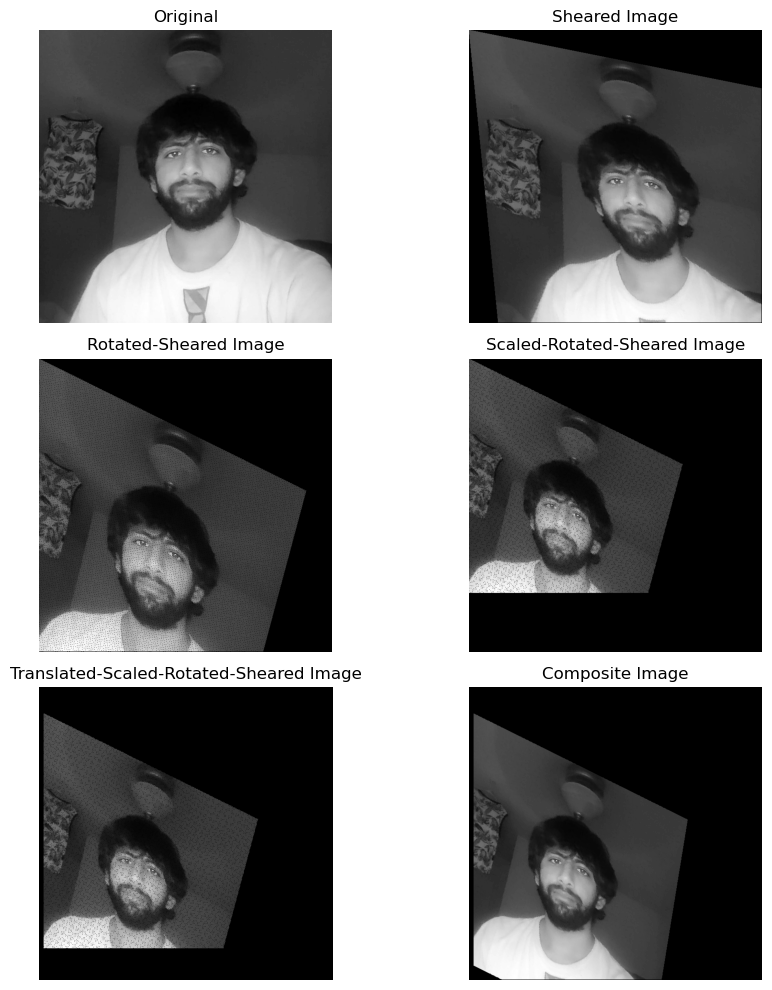

In [9]:
'''

Question 1) Part 2 - Using an image of my face

'''
WIDTH = 640
HEIGHT = 640


#Read the image
img = cv2.imread("picA.jpg", cv2.IMREAD_GRAYSCALE)

# Using the already above described transformation matrices, we will transform this image.

# After Shear
shear_img = transform(img, WIDTH, HEIGHT, shear_mat)

# After Rotation
rot_shear_img = transform(shear_img, WIDTH, HEIGHT, rotation_mat)

# After Scaling
scale_rot_shear_img = transform(rot_shear_img, WIDTH, HEIGHT, scale_mat)

# After Translation
trans_scale_rot_shear_img = translate(scale_rot_shear_img, WIDTH, HEIGHT, translation_vec)

# After Composition & Translation
comp_img = translate(transform(img, WIDTH, HEIGHT, composite_mat), WIDTH, HEIGHT, translation_vec)

images = [img, shear_img, rot_shear_img, scale_rot_shear_img, trans_scale_rot_shear_img, comp_img]
titles = ['Original', 'Sheared Image', 'Rotated-Sheared Image', 'Scaled-Rotated-Sheared Image', 'Translated-Scaled-Rotated-Sheared Image', 'Composite Image']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the axis array for easier indexing
axs = axs.ravel()

for i in range(6):
    axs[i].imshow(images[i], cmap='gray')  # Display the image
    axs[i].set_title(titles[i])            # Set the title for the subplot
    axs[i].axis('off')                     # Turn off the axis

plt.tight_layout()
plt.show()